Author: Sean Tulin
<br>
Date: Feb. 16, 2022
<br>
PHYS 2030 W22

# <font color=#46769B>Lesson 8: Bayes theorem</font>

## <font color=#46769B>Introduction</font>

Monte Carlo sampling is closely related to the topic of __Bayesian analysis__ (also known as Bayesian inference or Bayesian statistics). Bayesian analysis is a framework for making probabilistic statements about how likely something is given the data at hand. We have some familiarity with this from Exercises 11, 12, and 15 where we fit galactic observations to infer the total mass. 

Bayesian analysis relies on a mathematical result known as __Bayes theorem__. Let's illustrate this theorem with a simple example.

Suppose you have a medical test and you test positive for a disease. The error rate of the test is only 1\%. What is the probability that you have the disease? You might be tempted to answer 99\%. However, this is not the case.

The key concept of Bayes theorem is that we need to include our *prior knowledge* when calculating a probability. For example, suppose we know that 0.1\% of the population has this disease. This is an example of a __prior__.

Let's see how this changes our answer. Suppose we have 100,000 people in our population, which means that 100 people have the disease and 99,900 do not.
Now, everyone gets tested: 
- Since the test is 99\% accurate, 99 out of the 100 people with the disease will test positive.
- Since 1\% of tests will give the wrong result, 999 out of 99,900 people without the disease will also test positive.

So, if you are a random person in the population that tests positive, you are ten times more likely to be a false positive than someone who actually has the disease. The probability that you have the disease if you test positive is only
$$\frac{\mathrm{number\; who \;test \;positive\; with \;the \;disease}}{\rm total\; number \;who \;test\; positive}
= \frac{99}{99+999} \approx 9\%\, .$$

What was the flaw in our original thinking? We implicitly assumed that having-the-disease and not-having-the-disease were *equally* likely. Let's go through the same argument again, assuming a prior that 50\% of the population has the disease (e.g., Omicron). 
Out of a population of 100,000, there are 50,000 people with the disease. If everyone gets tested:
- 49,500 out of 50,000 people with the disease will test positive (99\%)
- 500 people of 50,000 people without the disease will test positive (1\%)

Now the probability that you have the disease if you test positive is
$$\frac{\mathrm{number\; who \;test \;positive\; with \;the \;disease}}{\rm total\; number \;who \;test\; positive}
= \frac{49,500}{49,500+500} = 99\%\, ,$$
as you originally might have thought.

The lesson from this is:
- Priors matter. 
- Anytime you calculate probability, you are *always* including a prior whether you specify it or not. 
- If you don't specify your prior, you are assuming that each possibility is equally likely, which may not be what you want.


## <font color=#46769B>Conditional probability</font>

Before we write down Bayes theorem, we need to introduce the notion of __conditional probabilities__. Suppose we have two events, $A$ and $B$. The conditional probability $P(A|B)$ is the probability that $A$ occurs *given that* $B$ occurs.<font color=red>$^1$</font> Likewise, the conditional probability $P(B|A)$ is the probability that $B$ occurs, given that $A$ occurs. It is not the case that $P(A|B) = P(B|A)$.

In our previous example:
- $A$ is having the disease.
- $B$ is testing positive for the disease.

Now,
- $P(A|B)$ is the probability of you having the disease given that you tested positive. According to our first calculation, this is $\approx 9\%$.
- $P(B|A)$ is the probability of you testing positive given that you have the disease. This is simply $99\%$, since the error rate is $1\%$.

### <font color=#46769B>Footnotes:</font>
<font color=red>$^1$</font> The standard notation here is unfortunately very confusing. We previously discussed *transition* probabilities $Q(x|x^\prime)$. Here we are discussing *conditional probabilities* $P(A|B)$. While they are similar notationally, they are distinct concepts.
- For the transition probability $Q(x|x^\prime)$, $x$ and $x^\prime$ are different outcomes (samples) of the *same* quantity. 
- For the conditional probability $P(A|B)$, $A$ and $B$ relate to outcomes of *different* quantities. 


## <font color=#46769B>Bayes theorem</font>

Bayes theorem allows us to relate $P(A|B)$ and $P(B|A)$ according to the following formula:
$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} \, . \qquad (1)$$
Here $P(A)$ and $P(B)$ are the total probabilities of $A$ or $B$, respectively.
- $P(A)$ is the total probability of having the disease. It is the *prior probability* that we assumed, $P(A) = 0.1\%$. Out of 100,000 people, there are 100 with the disease.
- $P(B)$ is the total probability of testing positive. We can write it as:
$$P(B) = P(B|A)P(A) + P(B|{\rm not} \; A) P({\rm not} \; A)$$
Note that "${\rm not}\; A$" means *not* having the disease. $P(B)$ is the *marginal* probability since we are marginalizing (averaging) over the different possibilities of whether you have the disease or not, only caring about whether you test positive. For the example above, we can calculate $P(B)$ as follows:
$$P(B) = \underbrace{99\%}_{P(B|A)} \times \underbrace{0.1 \%}_{P(A)} + \underbrace{1\%}_{P(B|{\rm not} \: A)} \times \underbrace{99.9\%}_{P({\rm not}\: A)} = 1.098\%\,.$$
Out of 100,000 people, there are 99 people with the disease who test positive and 999 people without the disease who test positive, for a total of 1098 people who test positive.

We can check Bayes theorem for our example. The right side of (1) gives 
$$\frac{P(B|A)P(A)}{P(B)} = \frac{99\% \times 0.1\%}{1.098\%} \approx 9\% \, ,$$
which is the same result we found for $P(A|B)$.
$P(A|B)$ is known as the __posterior probability__, that is, the probability of $A$ given all your knowledge (including the prior on $A$ and the condition that $B$ is satisfied).

### <font color=#46769B>Proof of Bayes theorem</font>

Let $P(A \cap B)$ denote the probability of *both* $A$ and $B$ (for example, testing positive *and* having the disease). We can calculate this probability in two ways:
$$P(A \cap B) = P(A|B) P(B) = P(B|A) P(B) \, . \qquad (2)$$
Diving both sides by $P(B)$ yields (1). 

For the example above:
- $P(A|B) P(B)$ says $P(B)\approx 1\%$ of the population will test positive. Among those, $P(A|B)\approx 9\%$ will have the disease.
- $P(B|A) P(A)$ says $P(A) = 0.1\%$ of the population will have the disease. Among these, $P(B|A) = 99\%$ will test positive.

In either case, the fraction of people that who both test postive *and* have the disease is the same no matter how we define things.

## <font color=#46769B>Example: Coin flip</font>

Suppose you have a coin with an unknown probability $p$ of getting heads (and probability $1-p$ of getting tails). You flip the coin 10 times in a row and get 10 heads. What is the probability that it is a fair coin?

It might be tempting to say that you definitely do *not* have a fair coin, but in fact the question so far is ill-defined. You need more information: What types of coins are there? How prevalent are different types of coins? In other words, you need to know the *priors*.

Let's suppose that one of out of every 1000 coins is a trick coin that will always yield heads. Let's use Bayes theorem to answer the question:
- $A$ is having a fair coin. ("${\rm not}\: A$" is having a biased coin that always yields heads.)
- $B$ is getting heads 10 times in a row.

We want to calculate $P(A|B)$, the probability of having a fair coin given that we got heads ten times in a row.
We have the following:
- The probability of having a fair coin is $P(A) = 99.9\%$. The probability of having a biased coin is $P({\rm not} \: A) = 0.1\%$
- The probability of getting heads ten in a row given a fair coin is $P(B|A) = \left(\frac{1}{2} \right)^{10} = \frac{1}{1024}$. The probability of getting heads ten times in a row with a biased coin is $P(B|{\rm not} \; A) = 100\%$.
- The probability of getting heads ten times in a row, *marginalized* over whether or not we had a fair coin, is
$$P(B) = \underbrace{99.9\%}_{\rm P(A)} \times \underbrace{\frac{1}{1024}}_{P(B|A)} + \underbrace{0.1\%}_{P({\rm not}\, A)} \times \underbrace{100\%}_{P(B|{\rm not}\, A)} \approx 0.2\%\, .$$

So, according to Bayes theorem, the posterior probability of a fair coin is 
$$P(A|B) = \frac{P(B|A) P(A)}{P(B)} \approx 49\% \, .$$

The code below calculates this number. It may be counterintuitive! The likelihood of getting 10 heads with a fair coin is low, but so is the probability of having anything other than a fair coin to begin with.

Play around with the code below. 
- You can change the number of flips in a row that all land on heads. Suppose you get 20 heads in a row, does this change the odds of having a fair coin?
- You can change the probability of having a biased coin.

In [4]:
num_flips = 10
probability_of_biased_coin = 0.001

P_A = 1 - probability_of_biased_coin
P_notA = probability_of_biased_coin

P_B_given_A = (1/2)**num_flips
P_B_given_notA = 1

P_B = P_B_given_A*P_A + P_B_given_notA*P_notA

print("probability of a fair coin:", P_B_given_A*P_A/P_B)
print("probability of a biased coin:", P_B_given_notA*P_notA/P_B)

probability of a fair coin: 0.000951813829407141
probability of a biased coin: 0.9990481861705929


## <font color=#46769B>Bayesian statistics</font>

If you understand this comic, you understand Bayes theorem. 

<div>
<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png" width="400">
<i>Figure credit: xkcd.com</i>
</div>

In case this is mysterious to you, let's define:
- $A$ is the sun exploding. "${\rm not} \; A$" is the sun not exploding. 
- $B$ is machine *telling* us the sun exploded.

The statistician on the left argues:
- The probability for the machine to lie and tell us that the sun exploded when it did *not* is $1/36 \approx 3\%$.
- Therefore, there is a $1/36 \approx 3\%$ chance that the sun did *not* explode given that machine told us it did.
- Hence, the probability that sun *did* explode (given that the machine told us it did) is $35/36 \approx 97\%$.

According to Bayes theorem, where is the flaw in this logic?

## <font color=#46769B>Bayes theorem with continuous variables</font>

So far, we considered Bayes theorem for a situation with discrete options for $A$. For example:
- $A$ was either having the disease or not.
- $A$ was either having a fair coin or not.

Now consider a situation in which $A$ is represented by a continuous variable.
We want to calculate the *posterior probability distribution function* $P(A|B)$ for our continuous variable $A$, given that $B$ has occurred.

Bayes theorem still says
$$P(A|B) = \frac{P(B|A) P(A)}{P(B)} \, .$$
The main difference is now is how we calculate the marginalized probability $P(B)$. Previously, we summed over the two different options:
$$P(B) = P(B|A) \, P(A) + P(B|{\rm not} \, A) \, P({\rm not} \, A)$$
Now we must integrate over all possible values $A$ can take:
$$P(B) = \int dA \, P(B|A) \, P(A) \, .$$

Let's go through an example to see how this works.

## <font color=#46769B>Example: Coin flip (continued)</font>


Say we have a coin with an unknown probability $p$ for getting heads. We flip the coin and get heads $n$ times in a row. What can we say about $p$?

First we need a prior for $p$. In the example above, we assumed a discrete choice that $p=0.5$ ($99.9\%$ of the time) or $p=1$ ($0.1\%$ of the time). Here we will allow $p$ to be a continuous variable between $[0,1]$. We will assume a *uniform* prior for $p$, which just means that all values of $p$ are equally likely. We write this prior as
$$P(p) = \left\{ \begin{array}{cc} 1 & 0 \le p \le 1 \\ 0 & {\rm otherwise} \end{array} \right. \, .$$


The different events in Bayes theorem are:
- $A$ is "having a coin that has probability $p$ of getting heads"
- $B$ is "getting heads $n$ times in a row"

We will change the notation a bit to make it more clear what $A$ and $B$ are:
- $P(A|B) = P(p|n \; {\rm heads})$ is the *conditional* probability distribution function for $p$, given that we obtained $n$ heads in a row. Note that $P(p|n \; {\rm heads})$ is a PDF for the continuous variable $p$. This is the posterior distribution we want to compute.
- $P(B|A) = P(n \; {\rm heads}|p)$ is the *conditional* probability for getting heads $n$ times, given that the coin had probability $p$ to get heads each time. This is simply
$$P(n \; {\rm heads}|p) = p^n \, .$$
- $P(A) = P(p)$ is the prior on having a coin with probability $p$, given above.
- $P(B) = P(n \; {\rm heads})$ is the *marginalized* probability to get $n$ heads in a row given at all probabilities $p$ are equally likely. We can calculate this:
$$P(n \; {\rm heads}) = \int dp \, P(n \; {\rm heads}|p)\,  P(p) = \int_0^1 dp \, p^n = \frac{1}{n+1} \, .$$

Using Bayes theorem, we can calculate the *posterior PDF* for having a coin with probability $p$:
$$P(p|n \; {\rm heads}) = \frac{P(n \; {\rm heads}|p) \, P(p)}{P(n \; {\rm heads})} 
= \left\{ \begin{array}{cc} (n+1) p^n & 0 \le p \le 1 \\ 0 & {\rm otherwise} \end{array} \right. \, .$$

We were able to calculate the posterior for $p$ analytically. 

Now let's write a short code to verify that this works out. Here is the logic of the code to follow:
- Select $N = 10^6$ random coins, each with their own value of $p$ (sampled uniformly between $[0,1]$).
- Flip each coin $n=3$ times. "Flipping a coin $n$ times" means selecting that coin with probability $p^n$. That is, we choose a random number $r$ within $[0,1]$. If $r < p^n$, then we have gotten heads $n$ times in a row.
- Create a list `landed_on_heads_n_times` that keeps track of whether a given coin $i$ landed on heads $n$ times or not. 
    - If coin $i$ landed on heads $n$ times, then assign `landed_on_heads_n_times[i] = 1` for that coin.
    - Otherwise, set `landed_on_heads_n_times[i] = 0` for that coin.
- Make a histogram for the values of $p$ only for those coins that landed on heads $n$ times. This will be done using `plt.hist(p,weights=landed_on_heads_n_times)`, that is, assigning a weight of `1` for coins that landed on heads $n$ times and a weight of `0` for coins that do not.
- Compare to the analytic result for $P(p|n \; {\rm heads})$ derived above.

Now to the code.

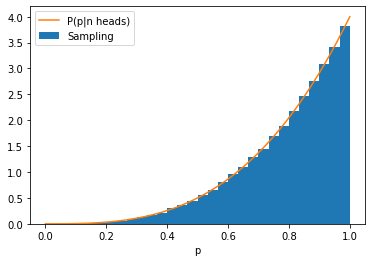

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Number of coins
num = 10**6

# Number of flips per coin
n = 3

# Sample p values for each coin
p = np.random.rand(num)

# Random number to decide whether landed on heads n times
r = np.random.rand(num)

# Keep track of whether a coin landed on heads n times
landed_on_heads_n_times = np.where( r < p**n, 1, 0 )

# Make a histogram of the posterior PDF for p
plt.hist(p,weights=landed_on_heads_n_times,density=True,bins=30,label="Sampling")

# Compare to analytic result above
x = np.linspace(0,1)
y = (n+1)*x**n
plt.plot(x,y,label="P(p|n heads)")

plt.legend()
plt.xlabel('p')
plt.show()